In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fitter import Fitter

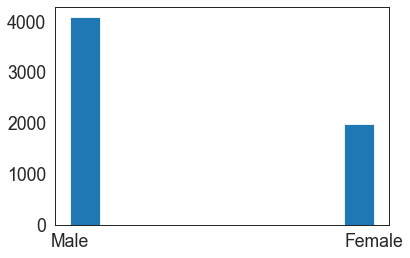

,hand_breadth,hand_circumference,hand_length,Gender,Weight,Height
0,90,214,193,1,81.65,180.34
1,86,203,195,1,72.57,172.72
2,93,220,203,1,92.99,172.72
3,91,217,194,1,79.38,167.64
4,94,222,218,1,96.62,195.58


In [94]:
#ładowanie pliku i zmiana wartości tabeli Gender
df = pd.read_csv('baza2.csv')
gender_change = {'Male': 1,
                 'Female': 0}
#rozkład dla płci
plt.hist(df['Gender'])

plt.show()
df['Gender'] = [gender_change[x] for x in df['Gender']]
df.head()

In [95]:
#średnie wartości bazy
df.mean(axis=0)

hand_breadth           84.953362
hand_circumference    203.861404
hand_length           189.286585
Gender                  0.672709
Weight                 79.264771
Height                173.373418
dtype: float64

In [96]:
#tabela korelcji w celu odpowiedniego doboru parametrów
df.corr()

,hand_breadth,hand_circumference,hand_length,Gender,Weight,Height
hand_breadth,1.000000,0.963017,0.704189,0.747338,0.708388,0.714933
hand_circumference,0.963017,1.000000,0.703555,0.776501,0.738392,0.722392
hand_length,0.704189,0.703555,1.000000,0.497361,0.599202,0.737603
Gender,0.747338,0.776501,0.497361,1.000000,0.564082,0.660288
Weight,0.708388,0.738392,0.599202,0.564082,1.000000,0.659984
Height,0.714933,0.722392,0.737603,0.660288,0.659984,1.000000


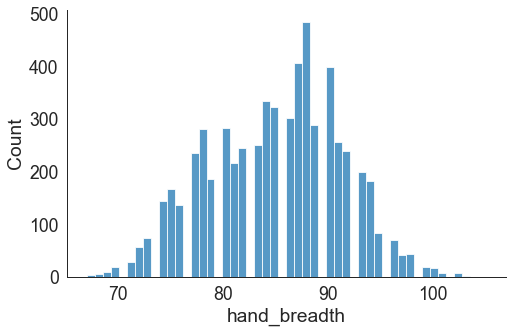

In [97]:
#rozkład danych szerokości dłoni
import seaborn as sns

sns.set_style('white')
sns.set_context("paper", font_scale=2)
sns.displot(data=df, x='hand_breadth', kind="hist", bins=50, aspect=1.5)

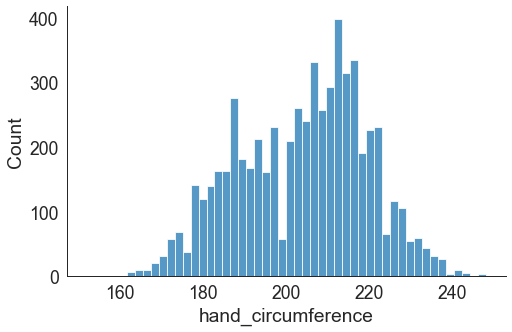

In [98]:
#rozkład danych obwodu dłoni
import seaborn as sns

sns.set_style('white')
sns.set_context("paper", font_scale=2)
sns.displot(data=df, x='hand_circumference', kind="hist", bins=50, aspect=1.5)

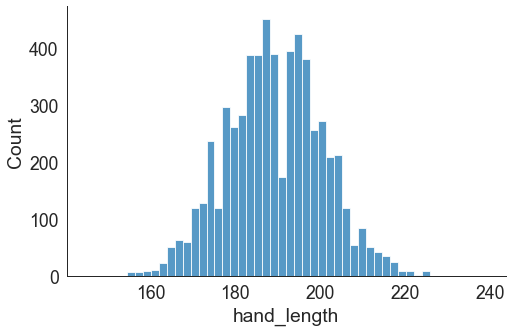

In [99]:
#rozkład danych długości dłoni
import seaborn as sns

sns.set_style('white')
sns.set_context("paper", font_scale=2)
sns.displot(data=df, x='hand_length', kind="hist", bins=50, aspect=1.5)

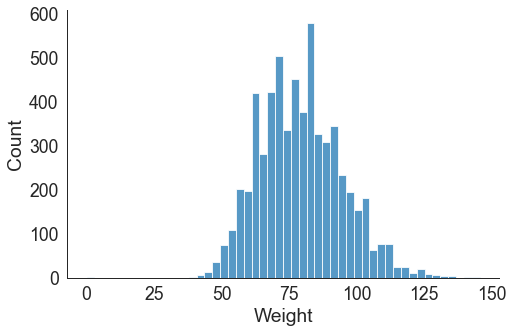

In [100]:
#rozkład danych wagi
import seaborn as sns

sns.set_style('white')
sns.set_context("paper", font_scale=2)
sns.displot(data=df, x='Weight', kind="hist", bins=50, aspect=1.5)

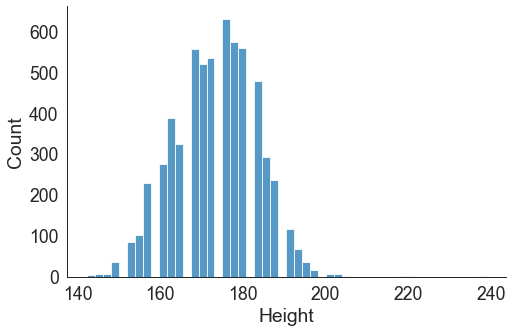

In [101]:
#rozkład danych wzrostu
import seaborn as sns

sns.set_style('white')
sns.set_context("paper", font_scale=2)
sns.displot(data=df, x='Height', kind="hist", bins=50, aspect=1.5)

        sumsquare_error          aic           bic  kl_div
norm           0.003132  1060.344929 -87829.034508     inf
gamma          0.003271  1068.097569 -87555.630845     inf
chi2           0.003427  1073.353523 -87274.162792     inf
cauchy         0.004453  1045.188913 -85692.553104     inf


{'norm': {'loc': 203.86140408701385, 'scale': 15.550142387953432}}

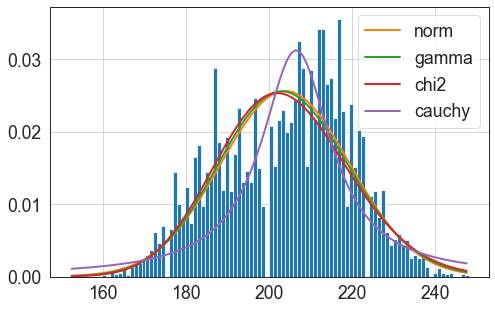

In [102]:
#dopasowanie rozkładu do długości ręki

import seaborn as sns

sns.set_style('white')
sns.set_context("paper", font_scale=2)
sns.displot(data=df, x='hand_length', kind="hist", bins=50, aspect=1.5)

list = ['cauchy', 'norm', 'gamma', 'chi2']

f = Fitter(df['hand_circumference'],
           distributions=list)
f.fit()

print(f.summary())
f.get_best(method='sumsquare_error')

Parametry modelu liniowego: [0.63239], 53.74442
Średni błąd  modelu liniowego: 5.09

Błąd średniokwadratowy modelu liniowego: 44.8

Parametry modelu GLM: [ 0.      2.0747 -0.0038], -82.48953
Średni błąd  modelu GLM: 5.07

Błąd średniokwadratowy modelu GLM: 44.3

Średni błąd modelu SVR: 5.08
Błąd średniokwadratowy modelu SVR: 44.6


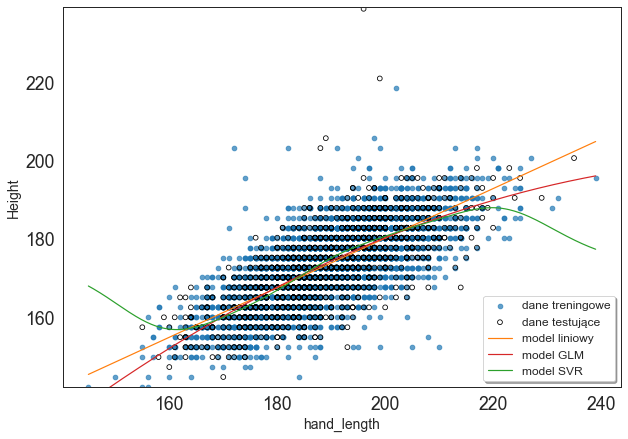


Male
Parametry modelu liniowego: [0.48744], 83.68982
Średni błąd  modelu liniowego: 4.51

Błąd średniokwadratowy modelu liniowego: 35.9

Parametry modelu GLM: [ 0.      1.2108 -0.0019], 13.53194
Średni błąd  modelu GLM: 4.5

Błąd średniokwadratowy modelu GLM: 35.8

Średni błąd modelu SVR: 4.52
Błąd średniokwadratowy modelu SVR: 36.0


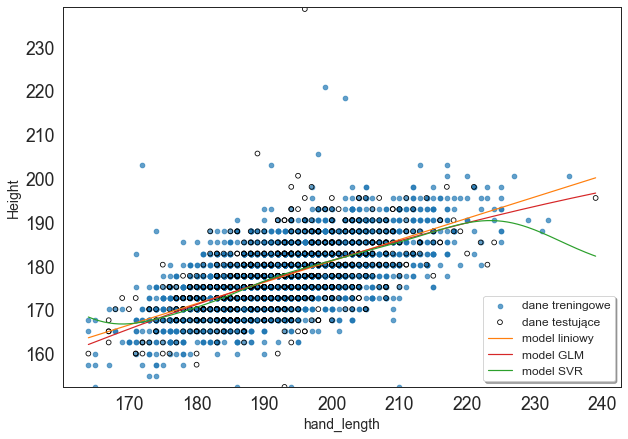


Female
Parametry modelu liniowego: [0.42635], 86.89839
Średni błąd  modelu liniowego: 4.37

Błąd średniokwadratowy modelu liniowego: 31.7

Parametry modelu GLM: [ 0.      1.4223 -0.0027], -3.7936
Średni błąd  modelu GLM: 4.36

Błąd średniokwadratowy modelu GLM: 31.6

Średni błąd modelu SVR: 4.4
Błąd średniokwadratowy modelu SVR: 32.5


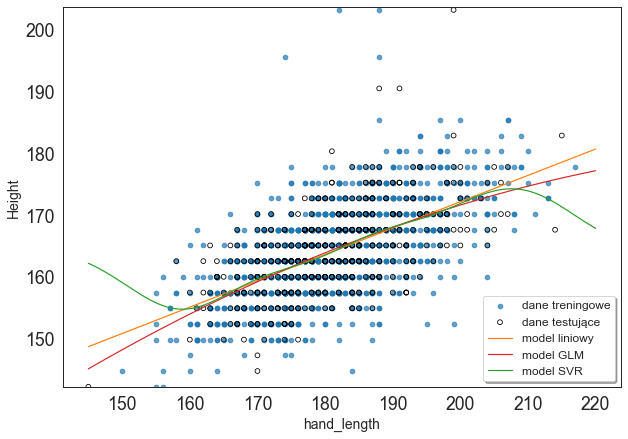

In [103]:
#obliczanie modeli regresji
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


def calc_reg(df, x_name, y_name):
    X = df[x_name].values
    Y = df[y_name].values

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75, test_size=0.25, random_state=143)

    # =========  Model liniowy =========
    from sklearn.linear_model import LinearRegression
    model_lin = LinearRegression()
    model_lin.fit(X_train.reshape(-1, 1),
                  Y_train)
    print(f'Parametry modelu liniowego: {np.round(model_lin.coef_, 5)}, {np.round(model_lin.intercept_, 5)}')
    MSE_lin = mean_absolute_error(Y_test, model_lin.predict(X_test.reshape(-1, 1)))
    print(f'Średni błąd  modelu liniowego: {MSE_lin:0.3}\n')
    MSE_lin = mean_squared_error(Y_test, model_lin.predict(X_test.reshape(-1, 1)))
    print(f'Błąd średniokwadratowy modelu liniowego: {MSE_lin:0.3}\n')

    # ===== Uogólniony model liniowy (ang. Generalized Linear Model) =====
    from sklearn.preprocessing import PolynomialFeatures
    model_GLM = LinearRegression()
    gen_features = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
    model_GLM.fit(gen_features.fit_transform(X_train.reshape(-1, 1)),
                  Y_train)
    print(f'Parametry modelu GLM: {np.round(model_GLM.coef_, 4)}, {np.round(model_GLM.intercept_, 5)}')
    MSE_GLM = mean_absolute_error(Y_test, model_GLM.predict(gen_features.fit_transform(X_test.reshape(-1, 1))))
    print(f'Średni błąd  modelu GLM: {MSE_GLM:0.3}\n')
    MSE_GLM = mean_squared_error(Y_test, model_GLM.predict(gen_features.fit_transform(X_test.reshape(-1, 1))))
    print(f'Błąd średniokwadratowy modelu GLM: {MSE_GLM:0.3}\n')

    #==== Maszyna wektorów wspierających (ang. Support Vector Machine) ====
    # SVR dla regresji, SVC dla kalsyfikacji
    from sklearn.svm import SVR
    model_svr = SVR(kernel='rbf', gamma='scale', C=1)
    model_svr.fit(X_train.reshape(-1, 1),
                  Y_train)
    MSE_SVR = mean_absolute_error(Y_test, model_svr.predict(X_test.reshape(-1, 1)))
    print(f'Średni błąd modelu SVR: {MSE_SVR:0.3}')
    MSE_SVR = mean_squared_error(Y_test, model_svr.predict(X_test.reshape(-1, 1)))
    print(f'Błąd średniokwadratowy modelu SVR: {MSE_SVR:0.3}')

    # Predykcje wszystkich modeli dla całego zakreso osi X
    os_x = np.linspace(start=X.min(), stop=X.max(), num=300)
    y_lin_pred = model_lin.predict(os_x.reshape(-1, 1))
    y_GLM_pred = model_GLM.predict(gen_features.fit_transform(os_x.reshape(-1, 1)))
    y_svr_pred = model_svr.predict(os_x.reshape(-1, 1))

    # Wizualizacja
    plt.figure(figsize=(10, 7))
    plt.scatter(X_train, Y_train, label='dane treningowe', alpha=0.7)
    plt.scatter(X_test, Y_test, edgecolor='black', facecolor='none', label='dane testujące')
    plt.plot(os_x, y_lin_pred, label='model liniowy', color='tab:orange')
    plt.plot(os_x, y_GLM_pred, label=f'model GLM', color='tab:red')
    plt.plot(os_x, y_svr_pred, label='model SVR', color='tab:green')
    plt.xlabel(x_name, fontsize=14)
    plt.ylabel(y_name, fontsize=14)
    plt.legend(fontsize=12, shadow=True, loc='lower right')
    plt.ylim([Y.min() - 0.1, Y.max() + 0.5])
    plt.show()


#obliczanie modeli regresji dla zaleznosci wyskosc i dlugosc dłoni
calc_reg(df, 'hand_length', 'Height')
print('\nMale')
calc_reg(df[df['Gender'] == 1], 'hand_length', 'Height')
print('\nFemale')
calc_reg(df[df['Gender'] == 0], 'hand_length', 'Height')

Parametry modelu liniowego: [0.73261], -70.04801
Średni błąd  modelu liniowego: 7.99

Błąd średniokwadratowy modelu liniowego: 1.04e+02

Parametry modelu GLM: [ 0.     -0.2449  0.0024], 28.19685
Średni błąd  modelu GLM: 7.98

Błąd średniokwadratowy modelu GLM: 1.04e+02

Średni błąd modelu SVR: 7.98
Błąd średniokwadratowy modelu SVR: 1.05e+02


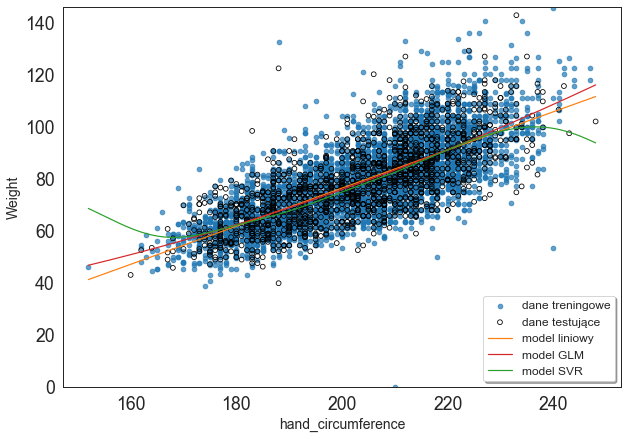


Male
Parametry modelu liniowego: [0.79419], -83.30662
Średni błąd  modelu liniowego: 8.23

Błąd średniokwadratowy modelu liniowego: 1.08e+02

Parametry modelu GLM: [0.     0.4009 0.0009], -41.56403
Średni błąd  modelu GLM: 8.23

Błąd średniokwadratowy modelu GLM: 1.08e+02

Średni błąd modelu SVR: 8.19
Błąd średniokwadratowy modelu SVR: 1.08e+02


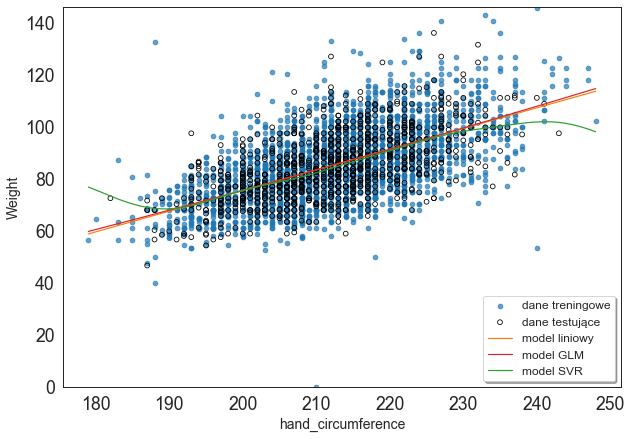


Female
Parametry modelu liniowego: [0.66795], -57.68512
Średni błąd  modelu liniowego: 6.82

Błąd średniokwadratowy modelu liniowego: 73.3

Parametry modelu GLM: [ 0.     -0.1457  0.0022], 18.18156
Średni błąd  modelu GLM: 6.82

Błąd średniokwadratowy modelu GLM: 73.6

Średni błąd modelu SVR: 6.77
Błąd średniokwadratowy modelu SVR: 73.6


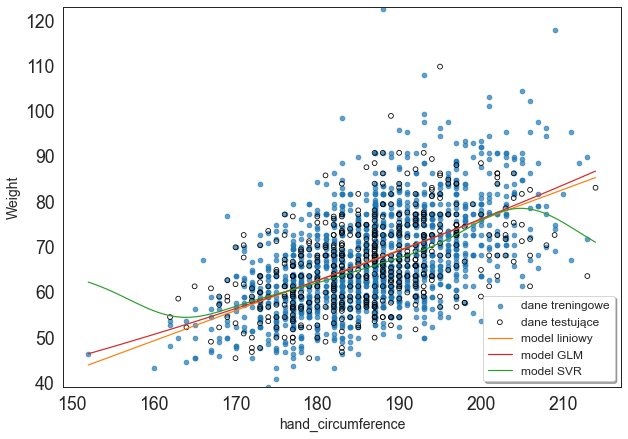

In [104]:
#obliczanie modeli regresji dla zaleznosci waga i obwód dłoni

calc_reg(df, 'hand_circumference', 'Weight')
print('\nMale')
calc_reg(df[df['Gender'] == 1], 'hand_circumference', 'Weight')
print('\nFemale')
calc_reg(df[df['Gender'] == 0], 'hand_circumference', 'Weight')

In [105]:
#obliczanie klasyfikacji płci

X = df.drop(['Weight', 'Height'], axis=1).values
Y = df['Gender'].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, test_size=0.25, random_state=143)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9393539881344759
